# Proyecto de Sales E-Commerce



Importo librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Acceder a drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Ruta con el archivo


In [5]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Archivos para montar/Sales/online_retail.csv'

- Cargar archivo a dataFrame


In [6]:
df = pd.read_csv(ruta)

Extraccion de primera informacion clave a tener encuenta. Cuantas entradas hay, cuales son mis columnas, que tipos de datos tienen. Imprimo las primeras o las últimas entradas

## Inspeccion basica

In [7]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- Buscar en cuantas lineas los datos cantidad y precio unitario son negativos


In [8]:
df['Quantity'].lt(0).sum()


np.int64(10624)

Hay 10624 filas con cantidades negativas, sobre 541000 total de filas (1.96% del data set).
Puede indicar devoluciones

In [9]:
df['UnitPrice'].lt(0).sum()

np.int64(2)

Hay solo 2 filas con precios unitarios negtivos. No representan ventas ni devoluciones

- Buscar en cuantas lineas los datos InvoiceNo arranca con C, indicando una cancelacion


In [10]:

df['InvoiceNo'].str.startswith('C').sum()

np.int64(9288)

Hay 9288 facturas canceladas. Podrian coicidir con las 10624 cantiddes negativas

Ver si existen invoice que empiecen con C y quantity > 0

In [11]:
(df['InvoiceNo'].str.startswith('C') &
    (df['Quantity'] > 0)).sum()

np.int64(0)

No existen resultados para esta combinación. Todas las invoice C, son devoluciones

Condiciones de venta real: Quantity > 0, UnitPrice >0, InvoiceNo empieza con C


In [12]:
ventas_mask = (
    (df['Quantity'] > 0) &
    (df['UnitPrice'] > 0) &
    (~df['InvoiceNo'].str.startswith('C'))
)

ventas_mask.sum()

np.int64(530104)

Proporcion del dataset que cumple con condiciones de venta real

In [13]:
ventas_mask.mean()

np.float64(0.9782158997174802)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


cuantas filas fallan si paso la columna InvoiceDate a dateTime?

In [16]:
pd.to_datetime(df['InvoiceDate'], errors='coerce').isna().sum()

np.int64(0)

La fila customerID tiene decimales reales?

In [17]:
df['CustomerID'].dropna().mod(1).sum()

np.float64(0.0)

Reconvertir InvoiceDate a dateTime

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Reconvertir CustomerId a Integer

In [19]:
df['CustomerID'] = df['CustomerID'].astype('Int64')

Confirmacion de limpieza

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      541909 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.6+ MB


# Crear el nuevo dataFrame


In [21]:
df_sales = df[ventas_mask].copy()

Filas y columnas

In [22]:
df_sales.shape

(530104, 8)

In [23]:
df_sales[['Quantity', 'UnitPrice']].describe()


,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [24]:
(df_sales['InvoiceNo'].str.startswith('C')).sum()

np.int64(0)

Outliers detectados sesgados a la derecha. Observar cuantos son. Definir un umbral razonable

In [25]:
df_sales[df_sales['Quantity'] > 1000].shape

(107, 8)

Separar por cuantiles

In [26]:
df_sales['Quantity'].quantile([0.95, 0.99, 0.995])

,Quantity
0.950,30.0
0.990,100.0
0.995,160.0


Lo mismo con UnitPrice

In [27]:
df_sales[df_sales['UnitPrice'] > 1000].shape

(54, 8)

In [28]:
df_sales['UnitPrice'].quantile([0.95, 0.99, 0.995])

,UnitPrice
0.950,9.95
0.990,16.98
0.995,24.96


Los datos outliers estan por encima del percentil 99.5

Crear la columna Revenue con Quantity * UnitPrice

In [29]:
df_sales['Revenue'] = df_sales['Quantity'] * df_sales['UnitPrice']

In [30]:
df_sales[['Quantity','UnitPrice','Revenue']].describe()

,Quantity,UnitPrice,Revenue
count,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,20.121871
std,155.524124,35.915681,270.356743
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.700000
max,80995.000000,13541.330000,168469.600000


# Observacion de clientes

Cientes unicos

In [31]:
df_sales['CustomerID'].nunique()

4338

Compras unicas (facturas)

In [32]:
df_sales['InvoiceNo'].nunique()

19960

Lineas de productos?

In [33]:
len(df_sales)

530104

Transformar el dataset a clientes agregados

- Revenue total que generó
- Cantidad de compras (facturas únicas)
- Cantidad total de productos comprados
- Primera y última compra
- Tiempo activo como cliente

Creacion del nuevo grupo


In [34]:
df_customer = (
    df_sales
    .groupby('CustomerID')
    .agg(
        total_revenue=('Revenue', 'sum'),
        total_quantity=('Quantity', 'sum'),
        total_invoices=('InvoiceNo', 'nunique'),
        first_purchase=('InvoiceDate', 'min'),
        last_purchase=('InvoiceDate', 'max')
    )
    .reset_index()
)

In [35]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      4338 non-null   Int64         
 1   total_revenue   4338 non-null   float64       
 2   total_quantity  4338 non-null   int64         
 3   total_invoices  4338 non-null   int64         
 4   first_purchase  4338 non-null   datetime64[ns]
 5   last_purchase   4338 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), float64(1), int64(2)
memory usage: 207.7 KB


In [36]:
df_customer.describe()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase
count,4338.0,4338.000000,4338.000000,4338.000000,4338,4338
mean,15300.408022,2054.266460,1191.289073,4.272015,2011-04-30 17:06:50.857538048,2011-09-08 11:38:59.045643008
min,12346.0,3.750000,1.000000,1.000000,2010-12-01 08:26:00,2010-12-01 09:53:00
25%,13813.25,307.415000,160.000000,1.000000,2011-01-17 11:13:15,2011-07-20 19:18:00
50%,15299.5,674.485000,379.000000,2.000000,2011-04-05 09:52:30,2011-10-20 10:40:30
75%,16778.75,1661.740000,992.750000,5.000000,2011-08-19 10:11:30,2011-11-22 11:05:45
max,18287.0,280206.020000,196915.000000,209.000000,2011-12-09 12:16:00,2011-12-09 12:50:00
std,1721.808492,8989.230441,5046.081546,7.697998,NaN,NaN


In [37]:
df_customer.head()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase
0,12346,77183.60,74215,1,2011-01-18 10:01:00,2011-01-18 10:01:00
1,12347,4310.00,2458,7,2010-12-07 14:57:00,2011-12-07 15:52:00
2,12348,1797.24,2341,4,2010-12-16 19:09:00,2011-09-25 13:13:00
3,12349,1757.55,631,1,2011-11-21 09:51:00,2011-11-21 09:51:00
4,12350,334.40,197,1,2011-02-02 16:01:00,2011-02-02 16:01:00


Ordenar dataSet de clientes por revenue para encontrar tops y bottoms, y preparar percentiles

In [38]:
df_customer = df_customer.sort_values('total_revenue', ascending=False)

In [39]:
df_customer.head()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase
1689,14646,280206.02,196915,73,2010-12-20 10:09:00,2011-12-08 12:12:00
4201,18102,259657.30,64124,60,2010-12-07 16:42:00,2011-12-09 11:50:00
3728,17450,194550.79,69993,46,2010-12-07 09:23:00,2011-12-01 13:29:00
3008,16446,168472.50,80997,2,2011-05-18 09:52:00,2011-12-09 09:15:00
1879,14911,143825.06,80265,201,2010-12-01 14:05:00,2011-12-08 15:54:00


In [40]:
df_customer.tail()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase
3323,16878,13.30,12,1,2011-09-16 17:39:00,2011-09-16 17:39:00
4098,17956,12.75,1,1,2011-04-04 13:47:00,2011-04-04 13:47:00
3014,16454,6.90,3,2,2011-10-06 16:57:00,2011-10-26 11:40:00
1793,14792,6.20,2,1,2011-10-07 09:19:00,2011-10-07 09:19:00
3217,16738,3.75,3,1,2011-02-15 09:46:00,2011-02-15 09:46:00


Cuantos clientes explican la mayor parte del Revenue?

- Ordenar clientes
- Acumular Revenue
- Medir porcentaje del total explican los primeros N clientes

Crear columna de Revenue acumulado y otra de porcentaje acumulado

In [41]:
df_customer['revenue_acumulado'] = df_customer['total_revenue'].cumsum()

In [42]:
total_revenue = df_customer['total_revenue'].sum()

In [43]:
df_customer['pct_revenue_acumulado'] = df_customer['revenue_acumulado'] / total_revenue


In [44]:
df_customer['pct_revenue_acumulado'].iloc[-1]


np.float64(0.9999999999999998)

In [45]:
df_customer['pct_clientes'] = (df_customer.index + 1) / len(df_customer)


In [46]:
df_customer.tail()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes
3323,16878,13.30,12,1,2011-09-16 17:39:00,2011-09-16 17:39:00,8911378.304,0.999997,0.766252
4098,17956,12.75,1,1,2011-04-04 13:47:00,2011-04-04 13:47:00,8911391.054,0.999998,0.944905
3014,16454,6.90,3,2,2011-10-06 16:57:00,2011-10-26 11:40:00,8911397.954,0.999999,0.695021
1793,14792,6.20,2,1,2011-10-07 09:19:00,2011-10-07 09:19:00,8911404.154,1.000000,0.413555
3217,16738,3.75,3,1,2011-02-15 09:46:00,2011-02-15 09:46:00,8911407.904,1.000000,0.741817


Resetear indice y volver a armar la columna de porcentajes clientes

In [47]:
df_customer = df_customer.reset_index(drop=True)


In [48]:
df_customer['pct_clientes'] = (df_customer.index + 1) / len(df_customer)


In [49]:
df_customer[['pct_clientes', 'pct_revenue_acumulado']].tail()


,pct_clientes,pct_revenue_acumulado
4333,0.999078,0.999997
4334,0.999308,0.999998
4335,0.999539,0.999999
4336,0.999769,1.000000
4337,1.000000,1.000000


In [50]:
df_customer['pct_clientes'].is_monotonic_increasing


True

Que porcentaje de las ventas totales lo produce el top 5 de clientes?

In [51]:
df_customer.head()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes
0,14646,280206.02,196915,73,2010-12-20 10:09:00,2011-12-08 12:12:00,280206.02,0.031444,0.000231
1,18102,259657.30,64124,60,2010-12-07 16:42:00,2011-12-09 11:50:00,539863.32,0.060581,0.000461
2,17450,194550.79,69993,46,2010-12-07 09:23:00,2011-12-01 13:29:00,734414.11,0.082413,0.000692
3,16446,168472.50,80997,2,2011-05-18 09:52:00,2011-12-09 09:15:00,902886.61,0.101318,0.000922
4,14911,143825.06,80265,201,2010-12-01 14:05:00,2011-12-08 15:54:00,1046711.67,0.117457,0.001153


Los clientes que representan el 0.10

In [52]:
df_customer[df_customer['pct_clientes'] <= 0.10]


,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes
0,14646,280206.02,196915,73,2010-12-20 10:09:00,2011-12-08 12:12:00,280206.02,0.031444,0.000231
1,18102,259657.30,64124,60,2010-12-07 16:42:00,2011-12-09 11:50:00,539863.32,0.060581,0.000461
2,17450,194550.79,69993,46,2010-12-07 09:23:00,2011-12-01 13:29:00,734414.11,0.082413,0.000692
3,16446,168472.50,80997,2,2011-05-18 09:52:00,2011-12-09 09:15:00,902886.61,0.101318,0.000922
4,14911,143825.06,80265,201,2010-12-01 14:05:00,2011-12-08 15:54:00,1046711.67,0.117457,0.001153
...,...,...,...,...,...,...,...,...,...
428,16253,3683.86,3233,2,2011-03-29 13:33:00,2011-10-04 09:09:00,5451078.15,0.611697,0.098893
429,15581,3679.97,286,13,2010-12-08 14:38:00,2011-08-11 09:38:00,5454758.12,0.612110,0.099124
430,15296,3672.86,1766,6,2011-01-17 11:57:00,2011-10-20 11:47:00,5458430.98,0.612522,0.099355
431,18079,3651.97,7432,4,2011-04-15 12:14:00,2011-10-25 15:27:00,5462082.95,0.612932,0.099585


Solo la ultima fila

In [53]:
df_customer[df_customer['pct_clientes'] <= 0.10].tail(1)


,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes
432,13137,3650.41,2226,8,2011-02-04 11:54:00,2011-11-29 12:09:00,5465733.36,0.613341,0.099816


El numero que representa de revenue acumulado

In [54]:
df_customer[df_customer['pct_clientes'] <= 0.10]['pct_revenue_acumulado'].tail(1)


,pct_revenue_acumulado
432,0.613341


El 20 %

In [55]:
df_customer[df_customer['pct_clientes'] <= 0.20].tail(1)

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes
866,16281,2062.06,934,1,2011-09-28 14:57:00,2011-09-28 14:57:00,6647378.011,0.74594,0.199862


El 30%

In [56]:
df_customer[df_customer['pct_clientes'] <= 0.30].tail(1)

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes
1300,17054,1356.33,804,5,2011-04-08 13:14:00,2011-11-11 12:56:00,7376541.101,0.827764,0.299908


¿Cómo se distribuye el revenue a medida que incorporo clientes de mayor a menor valor?

Gráfico

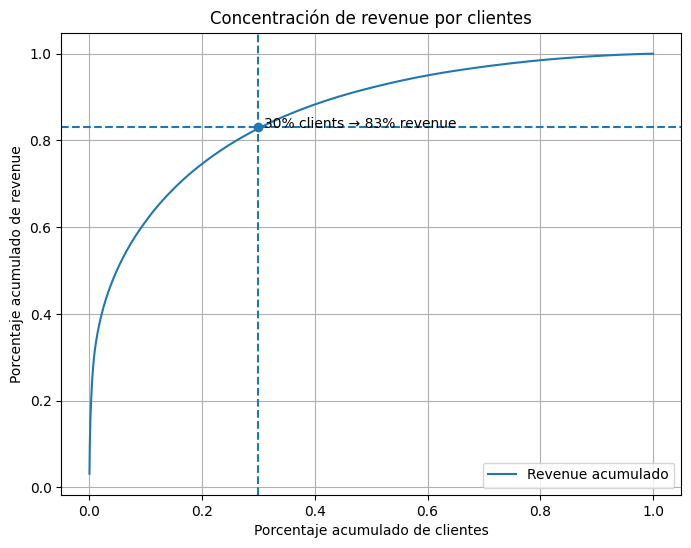

In [99]:
plt.figure(figsize=(8, 6))

plt.plot(
    df_customer['pct_clientes'],
    df_customer['pct_revenue_acumulado'],
    label='Revenue acumulado'
)

# Líneas de referencia
plt.axvline(x=0.3, linestyle='--')
plt.axhline(y=0.83, linestyle='--')
plt.scatter(0.3, 0.83)

# Etiqueta
plt.text(0.31, 0.83, '30% clients → 83% revenue')

plt.xlabel('Porcentaje acumulado de clientes')
plt.ylabel('Porcentaje acumulado de revenue')
plt.title('Concentración de revenue por clientes')
plt.legend()
plt.grid(True)

plt.savefig('pareto_customers.png', dpi=150, bbox_inches='tight')
plt.show()


In [58]:
df_customer.head()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes
0,14646,280206.02,196915,73,2010-12-20 10:09:00,2011-12-08 12:12:00,280206.02,0.031444,0.000231
1,18102,259657.30,64124,60,2010-12-07 16:42:00,2011-12-09 11:50:00,539863.32,0.060581,0.000461
2,17450,194550.79,69993,46,2010-12-07 09:23:00,2011-12-01 13:29:00,734414.11,0.082413,0.000692
3,16446,168472.50,80997,2,2011-05-18 09:52:00,2011-12-09 09:15:00,902886.61,0.101318,0.000922
4,14911,143825.06,80265,201,2010-12-01 14:05:00,2011-12-08 15:54:00,1046711.67,0.117457,0.001153


Crear ticket promedio

In [59]:
df_customer['avg_ticket'] = (
    df_customer['total_revenue'] / df_customer['total_invoices']
)

In [60]:
df_customer.head()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes,avg_ticket
0,14646,280206.02,196915,73,2010-12-20 10:09:00,2011-12-08 12:12:00,280206.02,0.031444,0.000231,3838.438630
1,18102,259657.30,64124,60,2010-12-07 16:42:00,2011-12-09 11:50:00,539863.32,0.060581,0.000461,4327.621667
2,17450,194550.79,69993,46,2010-12-07 09:23:00,2011-12-01 13:29:00,734414.11,0.082413,0.000692,4229.365000
3,16446,168472.50,80997,2,2011-05-18 09:52:00,2011-12-09 09:15:00,902886.61,0.101318,0.000922,84236.250000
4,14911,143825.06,80265,201,2010-12-01 14:05:00,2011-12-08 15:54:00,1046711.67,0.117457,0.001153,715.547562


Crear categorias según la recurrencia de clientes

In [61]:
df_customer['freq_segment'] = pd.cut(
    df_customer['total_invoices'],
    bins=[0, 1, 3, 10, df_customer['total_invoices'].max()],
    labels=['1 compra', '2-3 compras', '4-10 compras', '10+ compras']
)

In [62]:
df_customer.head()

,CustomerID,total_revenue,total_quantity,total_invoices,first_purchase,last_purchase,revenue_acumulado,pct_revenue_acumulado,pct_clientes,avg_ticket,freq_segment
0,14646,280206.02,196915,73,2010-12-20 10:09:00,2011-12-08 12:12:00,280206.02,0.031444,0.000231,3838.438630,10+ compras
1,18102,259657.30,64124,60,2010-12-07 16:42:00,2011-12-09 11:50:00,539863.32,0.060581,0.000461,4327.621667,10+ compras
2,17450,194550.79,69993,46,2010-12-07 09:23:00,2011-12-01 13:29:00,734414.11,0.082413,0.000692,4229.365000,10+ compras
3,16446,168472.50,80997,2,2011-05-18 09:52:00,2011-12-09 09:15:00,902886.61,0.101318,0.000922,84236.250000,2-3 compras
4,14911,143825.06,80265,201,2010-12-01 14:05:00,2011-12-08 15:54:00,1046711.67,0.117457,0.001153,715.547562,10+ compras


DF derivado según categoria de compra

In [63]:
df_freq = (
    df_customer
    .groupby('freq_segment')
    .agg(
        clientes=('CustomerID', 'count'),
        revenue_total=('total_revenue', 'sum'),
        revenue_promedio=('total_revenue', 'mean'),
        ticket_promedio=('avg_ticket', 'mean')
    )
    .reset_index()
)

/tmp/ipython-input-2820900697.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('freq_segment')


In [64]:
df_freq.head()

,freq_segment,clientes,revenue_total,revenue_promedio,ticket_promedio
0,1 compra,1493,616311.731,412.800891,412.800891
1,2-3 compras,1343,1392251.232,1036.672548,437.381012
2,4-10 compras,1165,2511989.731,2156.214361,372.406225
3,10+ compras,337,4390855.210,13029.243947,536.426354


In [65]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  Int64         
 7   Country      530104 non-null  object        
 8   Revenue      530104 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 40.9+ MB


In [66]:
df_sales.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,530104.000000,530104,530104.000000,397884.0,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453,20.121871
min,1.000000,2010-12-01 08:26:00,0.001000,12346.0,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.0,3.750000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.0,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.0,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.0,168469.600000
std,155.524124,NaN,35.915681,1713.14156,270.356743


Se extraen los ID del grupo 10% clientes

In [67]:
top_clients = df_customer.loc[
    df_customer['pct_clientes'] <= 0.10,
    'CustomerID'
]

Comparar clientes con productos

In [68]:
df_top_sales = df_sales[
    df_sales['CustomerID'].isin(top_clients)
]

In [69]:
df_top_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Agrupar por productos

In [70]:
df_top_products = (
    df_top_sales
    .groupby(['StockCode', 'Description'])
    .agg(
        total_revenue=('Revenue', 'sum'),
        total_quantity=('Quantity', 'sum'),
        avg_unit_price=('UnitPrice', 'mean'),
        n_customers=('CustomerID', 'nunique')
    )
    .reset_index()
)

In [71]:
df_top_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StockCode       3580 non-null   object 
 1   Description     3580 non-null   object 
 2   total_revenue   3580 non-null   float64
 3   total_quantity  3580 non-null   int64  
 4   avg_unit_price  3580 non-null   float64
 5   n_customers     3580 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 167.9+ KB


In [72]:
df_top_products.head()

,StockCode,Description,total_revenue,total_quantity,avg_unit_price,n_customers
0,10002,INFLATABLE POLITICAL GLOBE,543.15,639,0.850000,21
1,10080,GROOVY CACTUS INFLATABLE,20.42,50,0.505000,4
2,10120,DOGGY RUBBER,13.65,65,0.210000,5
3,10125,MINI FUNKY DESIGN TAPES,629.25,801,0.786296,16
4,10133,COLOURING PENCILS BROWN TUBE,270.71,492,0.584412,24


Ordenar por total revenue (impacto económico)

In [73]:
df_top_products = df_top_products.sort_values(
    'total_revenue',
    ascending=False
)

In [74]:
df_top_products.head()

,StockCode,Description,total_revenue,total_quantity,avg_unit_price,n_customers
2528,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995,2.080000,1
1273,22423,REGENCY CAKESTAND 3 TIER,103204.50,9145,12.295319,195
2041,23166,MEDIUM CERAMIC TOP STORAGE JAR,80062.13,76792,1.196947,47
3277,85123A,WHITE HANGING HEART T-LIGHT HOLDER,66304.35,24521,2.851294,149
3263,85099B,JUMBO BAG RED RETROSPOT,62609.16,34572,1.992733,192


Gráfico

In [75]:
df_products_top20 = (
    df_top_products
    .sort_values('total_revenue', ascending=False)
    .head(20)
)

In [76]:
df_products_top20.shape

(20, 6)

In [77]:
df_products_top20.head()

,StockCode,Description,total_revenue,total_quantity,avg_unit_price,n_customers
2528,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995,2.080000,1
1273,22423,REGENCY CAKESTAND 3 TIER,103204.50,9145,12.295319,195
2041,23166,MEDIUM CERAMIC TOP STORAGE JAR,80062.13,76792,1.196947,47
3277,85123A,WHITE HANGING HEART T-LIGHT HOLDER,66304.35,24521,2.851294,149
3263,85099B,JUMBO BAG RED RETROSPOT,62609.16,34572,1.992733,192


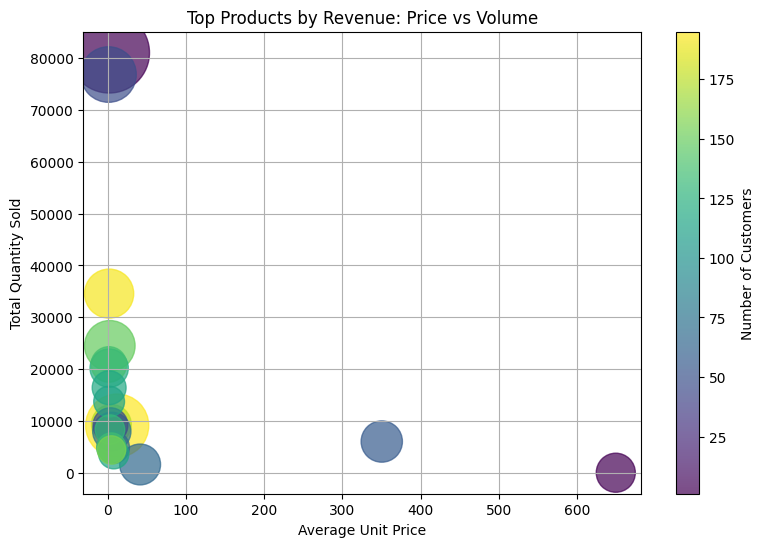

In [100]:
plt.figure(figsize=(9, 6))

scatter = plt.scatter(
    df_products_top20['avg_unit_price'],
    df_products_top20['total_quantity'],
    s=df_products_top20['total_revenue'] / 50,
    c=df_products_top20['n_customers'],
    alpha=0.7
)

plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity Sold')
plt.title('Top Products by Revenue: Price vs Volume')

plt.colorbar(scatter, label='Number of Customers')
plt.grid(True)

plt.savefig('top_products.png', dpi=150, bbox_inches='tight')
plt.show()

# Analisis de estacionalidad

In [79]:
df_sales['year'] = df_sales['InvoiceDate'].dt.year
df_sales['month'] = df_sales['InvoiceDate'].dt.month
df_sales['weekday'] = df_sales['InvoiceDate'].dt.dayofweek
df_sales['hour'] = df_sales['InvoiceDate'].dt.hour

In [80]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  Int64         
 7   Country      530104 non-null  object        
 8   Revenue      530104 non-null  float64       
 9   year         530104 non-null  int32         
 10  month        530104 non-null  int32         
 11  weekday      530104 non-null  int32         
 12  hour         530104 non-null  int32         
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 49.0+ MB


In [81]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8


Agrupar por año + mes

In [82]:
df_sales['year_month'] = df_sales['InvoiceDate'].dt.to_period('M')

In [93]:
df_monthly = (
    df_sales
    .groupby('year_month')
    .agg(total_revenue=('Revenue', 'sum'))
    .reset_index()
)

In [95]:
df_monthly['year_month'] = df_monthly['year_month'].dt.to_timestamp()

In [96]:
df_monthly

,year_month,total_revenue
0,2010-12-01,823746.140
1,2011-01-01,691364.560
2,2011-02-01,523631.890
3,2011-03-01,717639.360
4,2011-04-01,537808.621
5,2011-05-01,770536.020
6,2011-06-01,761739.900
7,2011-07-01,719221.191
8,2011-08-01,759138.380
9,2011-09-01,1058590.172


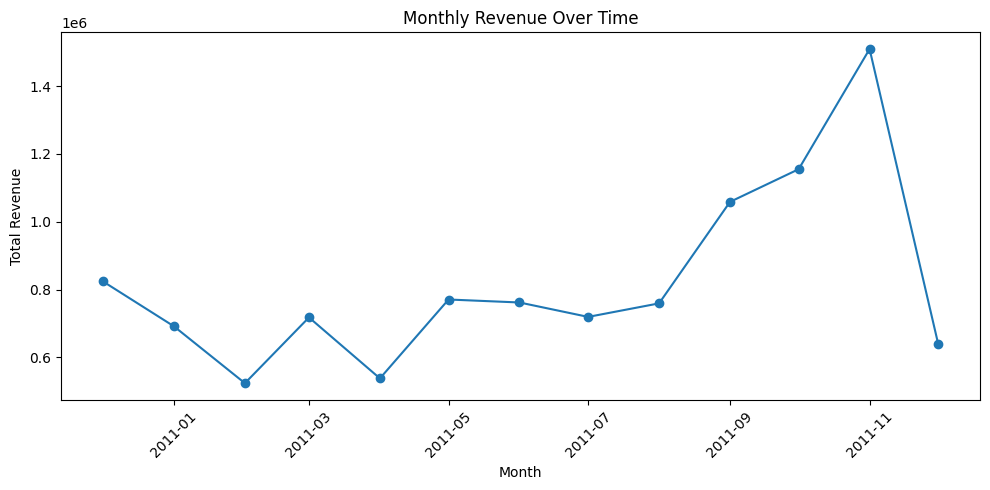

In [101]:

plt.figure(figsize=(10, 5))
plt.plot(df_monthly['year_month'], df_monthly['total_revenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('monthly_seasonality.png', dpi=150, bbox_inches='tight')
plt.show()

Agregacion por dias de semana

In [86]:
df_weekday = (
    df_sales
    .groupby('weekday')
    .agg(
        total_revenue=('Revenue', 'sum'),
        total_invoices=('InvoiceNo', 'nunique')
    )
    .reset_index()
)

In [87]:
df_weekday

,weekday,total_revenue,total_invoices
0,0,1779575.041,3126
1,1,2178632.611,3554
2,2,1851147.810,3690
3,3,2203161.240,4246
4,4,1840340.231,3140
5,6,813827.611,2204


Mapear nombres

In [88]:
weekday_map = {
    0: 'Mon', 1: 'Tue', 2: 'Wed',
    3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df_weekday['weekday_name'] = df_weekday['weekday'].map(weekday_map)

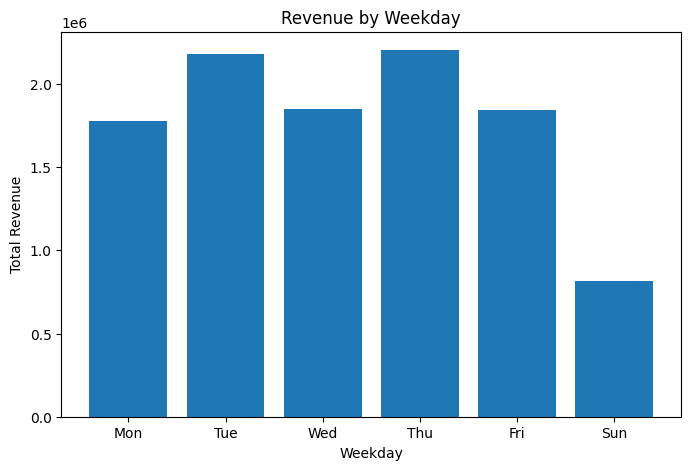

In [102]:
plt.figure(figsize=(8, 5))
plt.bar(df_weekday['weekday_name'], df_weekday['total_revenue'])
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.title('Revenue by Weekday')

plt.savefig('weekly_seasonality.png', dpi=150, bbox_inches='tight')
plt.show()

Estacionalidad por hora

In [90]:
df_hour = (
    df_sales
    .groupby('hour')
    .agg(
        total_revenue=('Revenue', 'sum'),
        total_invoices=('InvoiceNo', 'nunique')
    )
    .reset_index()
)

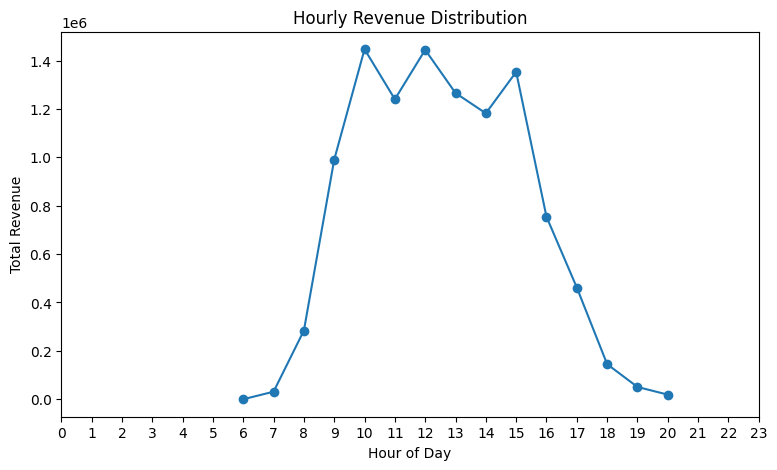

In [103]:
plt.figure(figsize=(9, 5))
plt.plot(df_hour['hour'], df_hour['total_revenue'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.title('Hourly Revenue Distribution')
plt.xticks(range(0, 24))

plt.savefig('hourly_distribution.png', dpi=150, bbox_inches='tight')
plt.show()